In [ ]:
!pip install bs4
!pip install requests
!pip install pandas

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=a0be145fe641fe29b5f9a227d9fad448ab00eac77b2bb99502cc11f019cf9c53
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
url = "https://www.worldometers.info/coronavirus/"

In [ ]:
import requests
response = requests.get(url)
print(response)


<Response [200]>


In [ ]:
print(type(response))

<class 'requests.models.Response'>


In [ ]:
print(dir(response))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<li
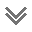

In [ ]:
response.content

In [ ]:
from bs4 import BeautifulSoup

Soup = BeautifulSoup(response.content, 'html.parser')
print(type(Soup))

<class 'bs4.BeautifulSoup'>


In [ ]:
print(dir(Soup))

['ASCII_SPACES', 'DEFAULT_BUILDER_FEATURES', 'DEFAULT_INTERESTING_STRING_TYPES', 'NO_PARSER_SPECIFIED_WARNING', 'ROOT_TAG_NAME', '__bool__', '__call__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_decode_markup', '_feed', '_find_all', '_find_one', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_linkage_fixer', '_markup_is_url', '_markup_resembles_filename', '_most_recent_element', '_namespaces', '_popToTag', '_should_pretty_print', 'append', 'attrs', 'builder', 'can_be_empty_element', 'cdata_list_attributes', 'childGenerator',

<bound method Tag.prettify of 
<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76
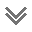

In [ ]:
print(Soup.prettify)

In [ ]:
# extract title text

title_text = Soup.select('title')
print(title_text)

title_text[0].getText()

[<title>COVID - Coronavirus Statistics - Worldometer</title>]


'COVID - Coronavirus Statistics - Worldometer'

**Extract Table**

In [ ]:
World_data = Soup.find("tbody").find_all("tr")
print(World_data)

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>130,008,461</td>
<td></td>
<td>1,664,036</td>
<td></td>
<td>125,537,885</td>
<td>+1,603</td>
<td>2,806,540</td>
<td>6,909</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>, <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Asia</nobr>
</td>
<td>221,086,623</td>
<td></td>
<td>1,552,249</td>
<td></td>
<td>205,252,684</td>
<td>+8,006</td>
<td>14,281,690</td>
<td>14,731</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Asia" style="display:none;">Asia</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 

In [ ]:
print(type(World_data))

<class 'bs4.element.ResultSet'>


In [ ]:
for row in World_data:
  print(row)
  break

<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>130,008,461</td>
<td></td>
<td>1,664,036</td>
<td></td>
<td>125,537,885</td>
<td>+1,603</td>
<td>2,806,540</td>
<td>6,909</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>


In [ ]:
World_data[8]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">110,057,289</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,190,019                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">107,829,742</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">1,037,528</td>
<td style="font-weight: bold; text-align:right">1,754</td>
<td style="font-weight: bold; text-align:right">328,720</td>
<td style="font-weight: bold; text-align:right">3,554</td>
<td style="font-weight: bold; text-align:right">1,186,546,440</td>
<td style="font-weight: bold; text-align:right">3,5

In [ ]:

complete_data = []

for i in range(8, len(World_data)):
  data = []

  list_data = World_data[i].find_all("td")
  for col in list_data:
    data.append(col.getText())

    complete_data.append(data)

In [ ]:
len(complete_data)

5082

**Lambda function bold text**

In [ ]:
def square_num(x):
  return x**2

square_num(2)

4

In [ ]:
square_num_lamd = lambda x: x**2
square_num_lamd(2)

4

**Map Function**

In [ ]:
sample_list = [1, 2, 3, 4, 5]

list(map(lambda x: x**2, sample_list))

[1, 4, 9, 16, 25]

In [ ]:
mapped_data = list(map(lambda x: x[1:10] + [x[12]] + [x[14]], complete_data))
print(mapped_data[0])

['USA', '110,057,289', '', '1,190,019                                ', '', '107,829,742', '', '1,037,528', '1,754', '1,186,546,440', '334,805,269 ']


In [ ]:
column_names = [
    "Names",
    "Total Cases",
    "New Cases",
    "Total Deaths",
    "New Deaths",
    "Total Recovered",
    "New Recovered",
    "Active Cases",
    "Serious Cases",
    "Total tests",
    "Population"
]



**Data Analysis: Pandas**
'pip install pandas'

In [ ]:
#

In [ ]:
import pandas as pd

df_covid = pd.DataFrame(mapped_data, columns = column_names)
df_covid

Names  Total Cases New Cases                               Total Deaths  \
0       USA  110,057,289            1,190,019                                   
1       USA  110,057,289            1,190,019                                   
2       USA  110,057,289            1,190,019                                   
3       USA  110,057,289            1,190,019                                   
4       USA  110,057,289            1,190,019                                   
...     ...          ...       ...                                        ...   
5077  China      503,302                5,272                                   
5078  China      503,302                5,272                                   
5079  China      503,302                5,272                                   
5080  China      503,302                5,272                                   
5081  China      503,302                5,272                                   

     New Deaths Total Recovered New Recovered Active Cases Serious Cases  \
0                   107,829,742                  1,037,528         1,754   
1                   107,829,742                  1,037,528         1,754   
2                   107,829,742                  1,037,528         1,754   
3                   107,829,742                  1,037,528         1,754   
4                   107,829,742                  1,037,528         1,754   
...         ...             ...           ...          ...           ...   
5077                    379,053                    118,977           N/A   
5078                    379,053                    118,977           N/A   
5079                    379,053                    118,977           N/A   
5080                    379,053                    118,977           N/A   
5081                    379,053                    118,977           N/A   

        Total tests                                     Population  
0     1,186,546,440                                   334,805,269   
1     1,186,546,440                                   334,805,269   
2     1,186,546,440                                   334,805,269   
3     1,186,546,440                                   334,805,269   
4     1,186,546,440                                   334,805,269   
...             ...                                            ...  
5077    160,000,000  1,448,471,400                                  
5078    160,000,000  1,448,471,400                                  
5079    160,000,000  1,448,471,400                                  
5080    160,000,000  1,448,471,400                                  
5081    160,000,000  1,448,471,400                                  

[5082 rows x 11 columns]

In [ ]:
print(type(df_covid))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(dir(df_covid))

['Names', 'Population', 'T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__

In [ ]:
# save to csv file

df_covid.to_csv("covid_data.csv", index=False)

In [ ]:
# read_csv
df_covid = pd.read_csv('covid_data.csv')

df_covid.head()

Names  Total Cases New Cases                               Total Deaths  \
0   USA  110,057,289       NaN  1,190,019                                   
1   USA  110,057,289       NaN  1,190,019                                   
2   USA  110,057,289       NaN  1,190,019                                   
3   USA  110,057,289       NaN  1,190,019                                   
4   USA  110,057,289       NaN  1,190,019                                   

   New Deaths Total Recovered New Recovered Active Cases Serious Cases  \
0         NaN     107,829,742           NaN    1,037,528         1,754   
1         NaN     107,829,742           NaN    1,037,528         1,754   
2         NaN     107,829,742           NaN    1,037,528         1,754   
3         NaN     107,829,742           NaN    1,037,528         1,754   
4         NaN     107,829,742           NaN    1,037,528         1,754   

     Total tests    Population  
0  1,186,546,440  334,805,269   
1  1,186,546,440  334,805,269   
2  1,186,546,440  334,805,269   
3  1,186,546,440  334,805,269   
4  1,186,546,440  334,805,269

In [ ]:
False + False + True

1

In [ ]:
missing_data = df_covid.isnull().sum()
missing_data

Names                 0
Total Cases           0
New Cases          5060
Total Deaths          0
New Deaths         5082
Total Recovered    1078
New Recovered      4950
Active Cases       1056
Serious Cases      3938
Total tests         396
Population            0
dtype: int64

In [ ]:
print(type(missing_data))

<class 'pandas.core.series.Series'>


In [ ]:
df_covid.T

0     \
Names                                                  USA   
Total Cases                                    110,057,289   
New Cases                                              NaN   
Total Deaths     1,190,019                                   
New Deaths                                             NaN   
Total Recovered                                107,829,742   
New Recovered                                          NaN   
Active Cases                                     1,037,528   
Serious Cases                                        1,754   
Total tests                                  1,186,546,440   
Population                                    334,805,269    

                                                      1     \
Names                                                  USA   
Total Cases                                    110,057,289   
New Cases                                              NaN   
Total Deaths     1,190,019                                   
New Deaths                                             NaN   
Total Recovered                                107,829,742   
New Recovered                                          NaN   
Active Cases                                     1,037,528   
Serious Cases                                        1,754   
Total tests                                  1,186,546,440   
Population                                    334,805,269    

                                                      2     \
Names                                                  USA   
Total Cases                                    110,057,289   
New Cases                                              NaN   
Total Deaths     1,190,019                                   
New Deaths                                             NaN   
Total Recovered                                107,829,742   
New Recovered                                          NaN   
Active Cases                                     1,037,528   
Serious Cases                                        1,754   
Total tests                                  1,186,546,440   
Population                                    334,805,269    

                                                      3     \
Names                                                  USA   
Total Cases                                    110,057,289   
New Cases                                              NaN   
Total Deaths     1,190,019                                   
New Deaths                                             NaN   
Total Recovered                                107,829,742   
New Recovered                                          NaN   
Active Cases                                     1,037,528   
Serious Cases                                        1,754   
Total tests                                  1,186,546,440   
Population                                    334,805,269    

                                                      4     \
Names                                                  USA   
Total Cases                                    110,057,289   
New Cases                                              NaN   
Total Deaths     1,190,019                                   
New Deaths                                             NaN   
Total Recovered                                107,829,742   
New Recovered                                          NaN   
Active Cases                                     1,037,528   
Serious Cases                                        1,754   
Total tests                                  1,186,546,440   
Population                                    334,805,269    

                                                      5     \
Names                                                  USA   
Total Cases                                    110,057,289   
New Cases                                              NaN   
Total Deaths     1,190,019                                   
New Deaths         

**seaborn**

'pip install seaborn'

<Axes: >

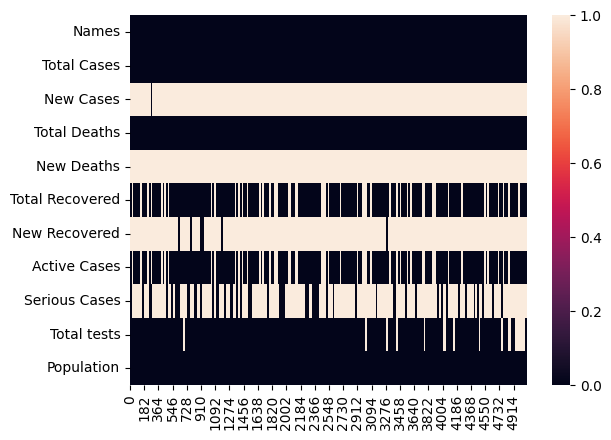

In [ ]:
import seaborn as sns

sns.heatmap(df_covid.isnull().T)

<Axes: >

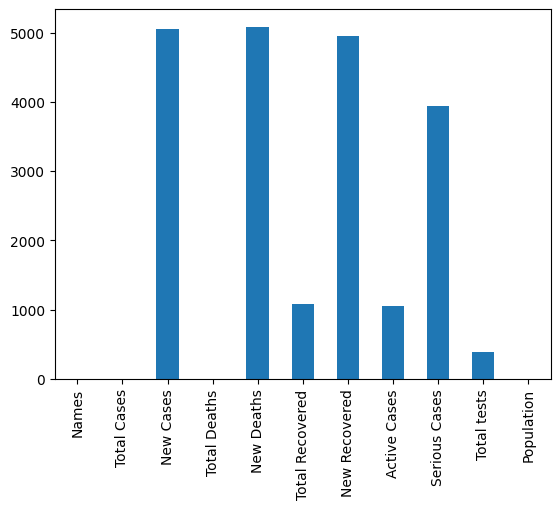

In [ ]:
missing_data.plot(kind='bar')

In [ ]:
import matplotlib
from matplotlib import pyplot as plt # import matplotlib.pyplot as plt

missing_data.plot(kind='barh')

plt.title('Missing Data Count')
plt.xlabel('count')
olt.ylabel('Category')

In [ ]:
# get value

missing_data.values

array([   0,    0, 5060,    0, 5082, 1078, 4950, 1056, 3938,  396,    0])

In [ ]:
# get index

missing_data.index

Index(['Names', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious Cases',
       'Total tests', 'Population'],
      dtype='object')

**plotly**

In [ ]:
import plotly.express as px

In [ ]:
px.bar(x = missing_data.index, y = missing_data.values)

In [ ]:
# tableu

In [ ]:
px.pie(values=missing_data.values, names=missing_data.index)

In [ ]:
df_covid.head()

Names  Total Cases New Cases                               Total Deaths  \
0   USA  110,057,289       NaN  1,190,019                                   
1   USA  110,057,289       NaN  1,190,019                                   
2   USA  110,057,289       NaN  1,190,019                                   
3   USA  110,057,289       NaN  1,190,019                                   
4   USA  110,057,289       NaN  1,190,019                                   

   New Deaths Total Recovered New Recovered Active Cases Serious Cases  \
0         NaN     107,829,742           NaN    1,037,528         1,754   
1         NaN     107,829,742           NaN    1,037,528         1,754   
2         NaN     107,829,742           NaN    1,037,528         1,754   
3         NaN     107,829,742           NaN    1,037,528         1,754   
4         NaN     107,829,742           NaN    1,037,528         1,754   

     Total tests    Population  
0  1,186,546,440  334,805,269   
1  1,186,546,440  334,805,269   
2  1,186,546,440  334,805,269   
3  1,186,546,440  334,805,269   
4  1,186,546,440  334,805,269

In [ ]:
df_covid.dtypes

Names               object
Total Cases         object
New Cases           object
Total Deaths        object
New Deaths         float64
Total Recovered     object
New Recovered       object
Active Cases        object
Serious Cases       object
Total tests         object
Population          object
dtype: object